<a href="https://colab.research.google.com/github/queziamirandaDev/Python-para-DataScience/blob/main/15_Decision_Tree_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import aed

In [2]:
df_pagadores = pd.read_csv('/content/dados_bom_pagador.csv')

df_pagadores.head()

,Bom_Pagador,Renda_Mensal,Idade,Estado_Civil,Possui_Cartao_Credito,Escolaridade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Historico_Inadimplencia,Utiliza_Limite_Cartao,Valor_Emprestimos,Tipo_Residencia,Trabalha_Formalmente
0,Sim,1688,21,Solteiro,Não,Pós-graduação,0,5,429,Nunca,97,40613,Financiada,Sim
1,Sim,12645,32,Viúvo,Não,Pós-graduação,19,4,580,Nunca,69,44769,Própria,Sim
2,Sim,13308,22,Solteiro,Não,Fundamental,4,2,346,Nunca,48,15783,Alugada,Sim
3,Sim,3376,20,Solteiro,Sim,Médio,7,2,355,Nunca,58,32615,Financiada,Sim
4,Não,12669,39,Divorciado,Não,Fundamental,4,1,866,Nunca,41,38217,Alugada,Sim


In [3]:
df_pagadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bom_Pagador              100 non-null    object
 1   Renda_Mensal             100 non-null    int64 
 2   Idade                    100 non-null    int64 
 3   Estado_Civil             100 non-null    object
 4   Possui_Cartao_Credito    100 non-null    object
 5   Escolaridade             100 non-null    object
 6   Tempo_Emprego            100 non-null    int64 
 7   Qtd_Filhos               100 non-null    int64 
 8   Score_Credito            100 non-null    int64 
 9   Historico_Inadimplencia  100 non-null    object
 10  Utiliza_Limite_Cartao    100 non-null    int64 
 11  Valor_Emprestimos        100 non-null    int64 
 12  Tipo_Residencia          100 non-null    object
 13  Trabalha_Formalmente     100 non-null    object
dtypes: int64(7), object(7)
memory usage: 11.1+ 

In [4]:
df_pagadores.describe().round(2)

,Renda_Mensal,Idade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Utiliza_Limite_Cartao,Valor_Emprestimos
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,8307.68,40.26,16.21,2.61,635.56,50.81,26713.27
std,4034.30,14.02,8.90,1.59,207.20,29.40,14117.50
min,1509.00,18.00,0.00,0.00,302.00,1.00,530.00
25%,4785.75,28.00,9.00,1.00,452.00,23.75,16238.25
50%,8787.00,42.00,18.00,2.00,596.50,49.50,25575.00
75%,11871.25,51.25,23.25,4.00,840.50,79.00,39991.25
max,14869.00,65.00,30.00,5.00,977.00,100.00,49517.00


In [5]:
df_pagadores.describe(include='object')

,Bom_Pagador,Estado_Civil,Possui_Cartao_Credito,Escolaridade,Historico_Inadimplencia,Tipo_Residencia,Trabalha_Formalmente
count,100,100,100,100,100,100,100
unique,2,4,2,4,3,3,2
top,Sim,Viúvo,Sim,Superior,Nunca,Própria,Sim
freq,74,31,53,27,65,36,84


<Axes: xlabel='Escolaridade'>

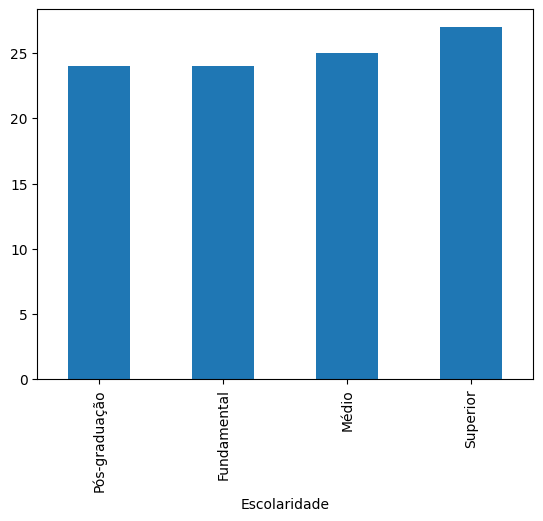

In [6]:
df_pagadores['Escolaridade'].value_counts().sort_values().plot(kind='bar')

In [7]:
# AED é um modulo criada para calcular estatistica
# Analise IV = information values é como se fosse correlação

from sklearn.tree import DecisionTreeClassifier, plot_tree  #marchine learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import numpy as np

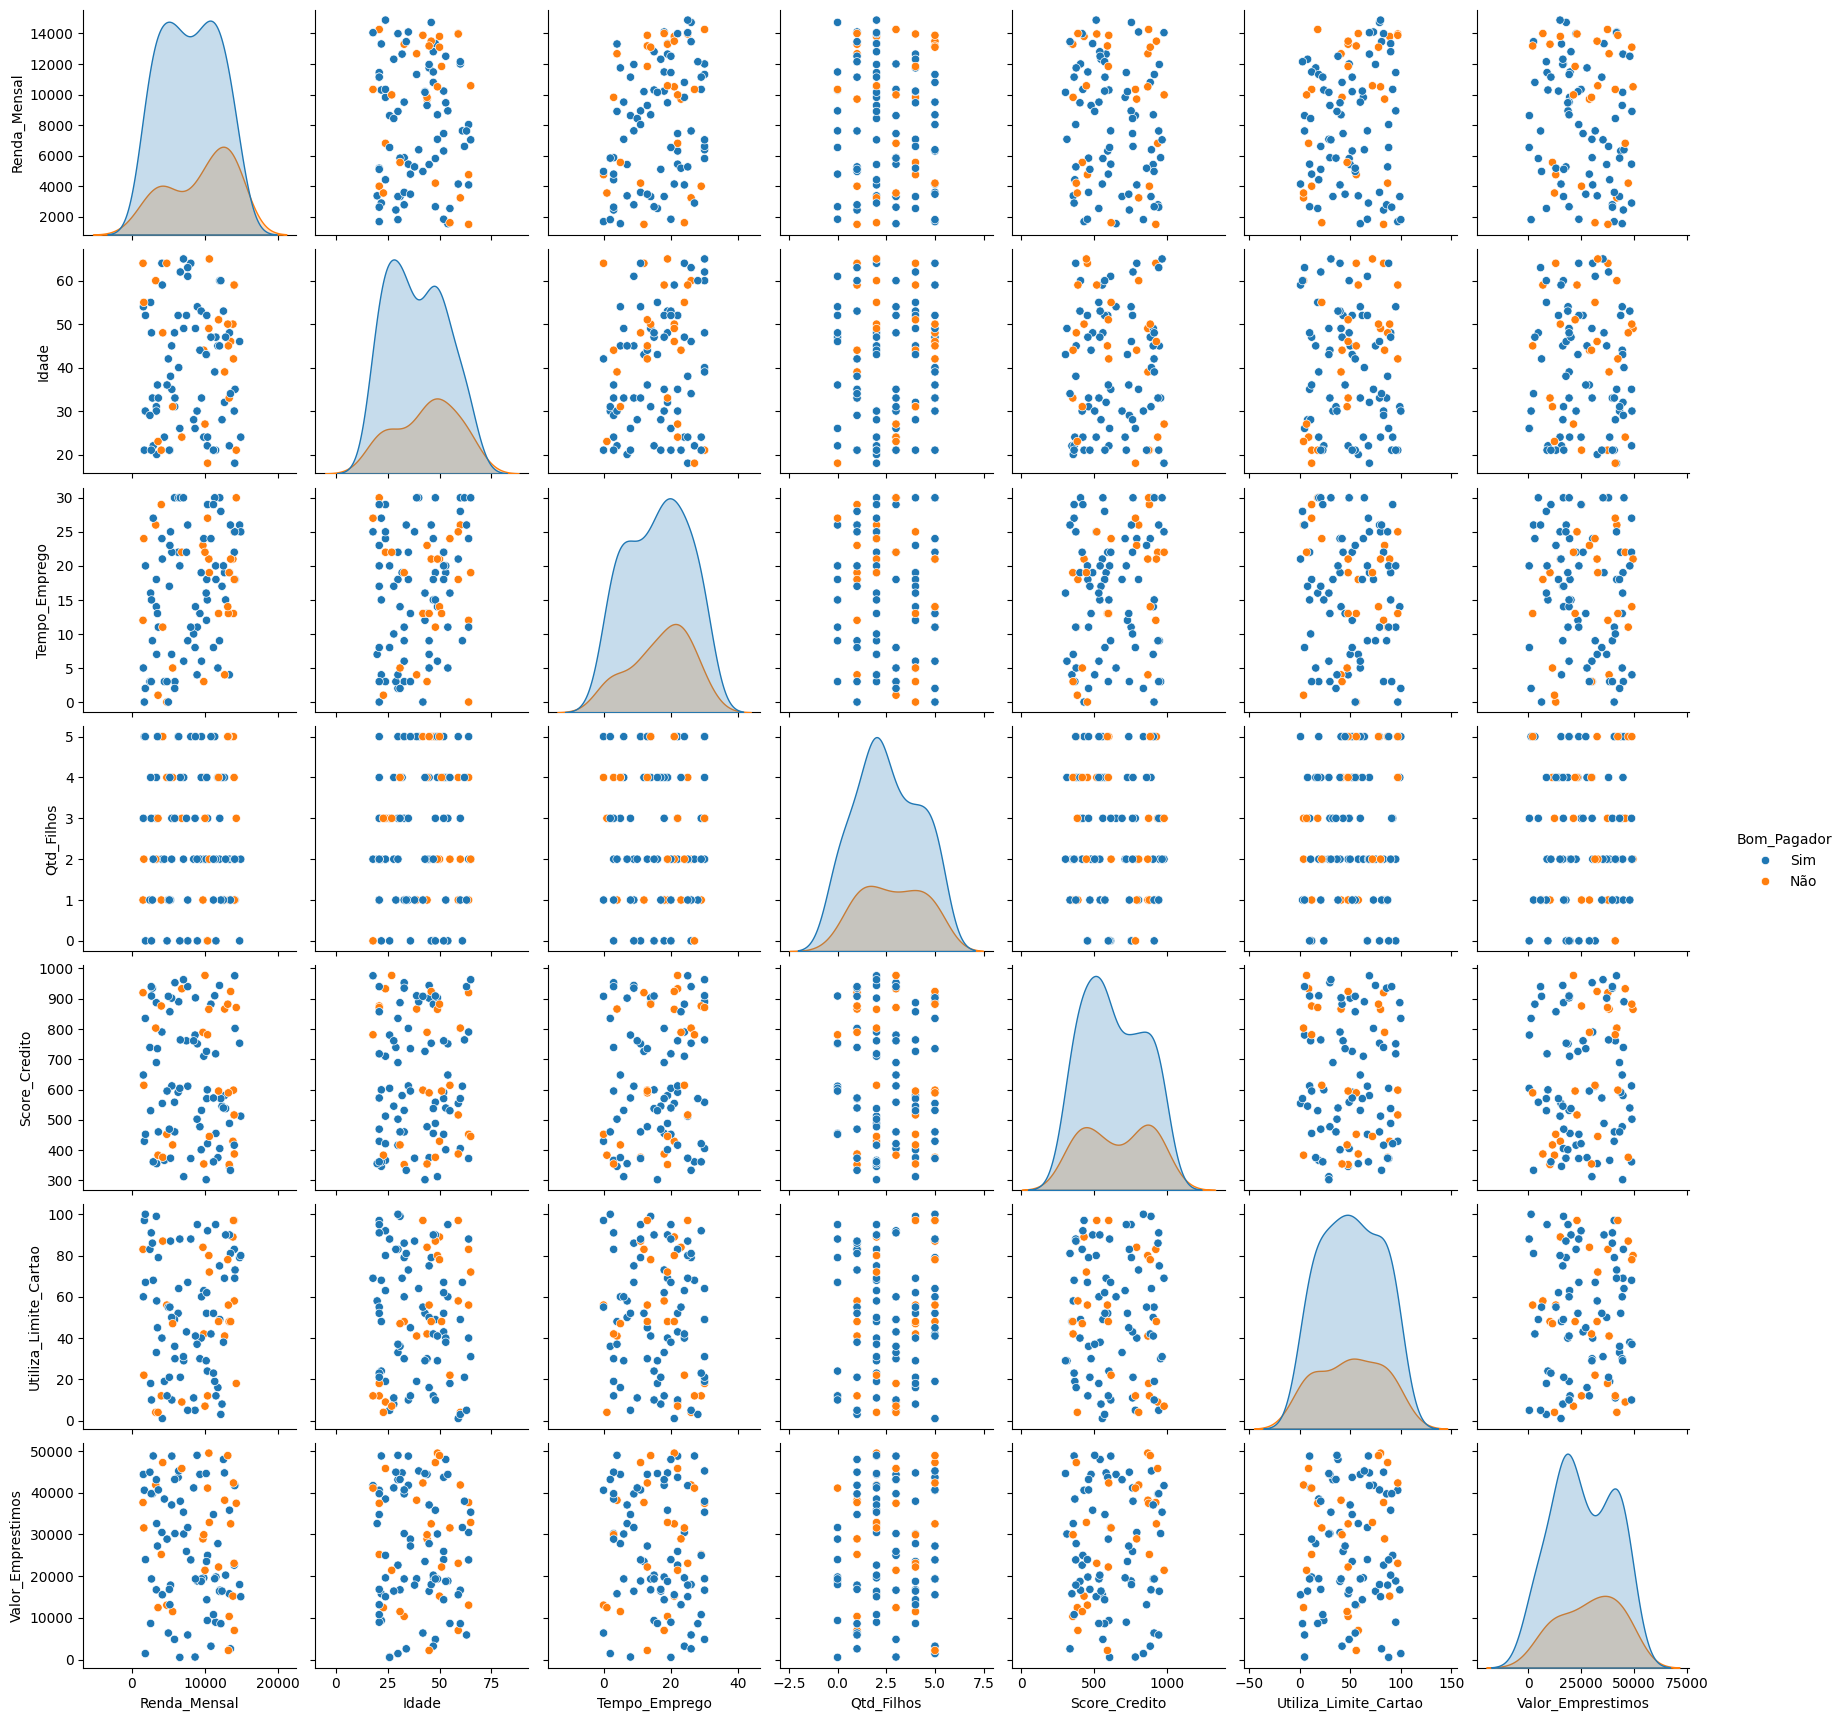

In [8]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
sns.pairplot(df_pagadores, hue='Bom_Pagador')

In [10]:
df_pagadores['alvo'] = np.where(df_pagadores['Bom_Pagador'] == 'Sim',1,0)

df_iv = aed.analise_iv(df_pagadores, 'alvo')

df_iv.get_lista_iv()

#  0,3 e 0,5 melhores para avaliar ter impacto na analise

/content/aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to

alvo,IV
Variavel,
Bom_Pagador,9.21
Valor_Emprestimos,1.30
Utiliza_Limite_Cartao,1.19
Renda_Mensal,0.58
Tempo_Emprego,0.57
Score_Credito,0.55
Idade,0.20
Qtd_Filhos,0.19
Historico_Inadimplencia,0.05


* Historico_Inadimplencia, Escolaridade, Trabalha_Formalmente, Estado_Civil = Forte, melhores para avaliar e ter impacto na analise

In [11]:
# transformando as informações de Strings para linguagem de maquina

df_modelo = pd.get_dummies(df_pagadores)

df_modelo.head()

,Renda_Mensal,Idade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Utiliza_Limite_Cartao,Valor_Emprestimos,alvo,Bom_Pagador_Não,Bom_Pagador_Sim,...,Escolaridade_Pós-graduação,Escolaridade_Superior,Historico_Inadimplencia_1 vez,Historico_Inadimplencia_2 ou mais,Historico_Inadimplencia_Nunca,Tipo_Residencia_Alugada,Tipo_Residencia_Financiada,Tipo_Residencia_Própria,Trabalha_Formalmente_Não,Trabalha_Formalmente_Sim
0,1688,21,0,5,429,97,40613,1,False,True,...,True,False,False,False,True,False,True,False,False,True
1,12645,32,19,4,580,69,44769,1,False,True,...,True,False,False,False,True,False,False,True,False,True
2,13308,22,4,2,346,48,15783,1,False,True,...,False,False,False,False,True,True,False,False,False,True
3,3376,20,7,2,355,58,32615,1,False,True,...,False,False,False,False,True,False,True,False,False,True
4,12669,39,4,1,866,41,38217,0,True,False,...,False,False,False,False,True,True,False,False,False,True


In [12]:
# Variavel Alvo

y = df_modelo['alvo']

x = df_modelo.drop([
    'alvo',
    'Bom_Pagador_Sim',
    'Bom_Pagador_Não'
], axis=1)

In [13]:
# Split Data - Divisão dos dados , sempre dentro de (70%, 30%) à (80%,20%)

X_train,X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

# Treinamento do modelo

modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Text(0.5, 1.0, 'Estimativa de Bom Pagadores')

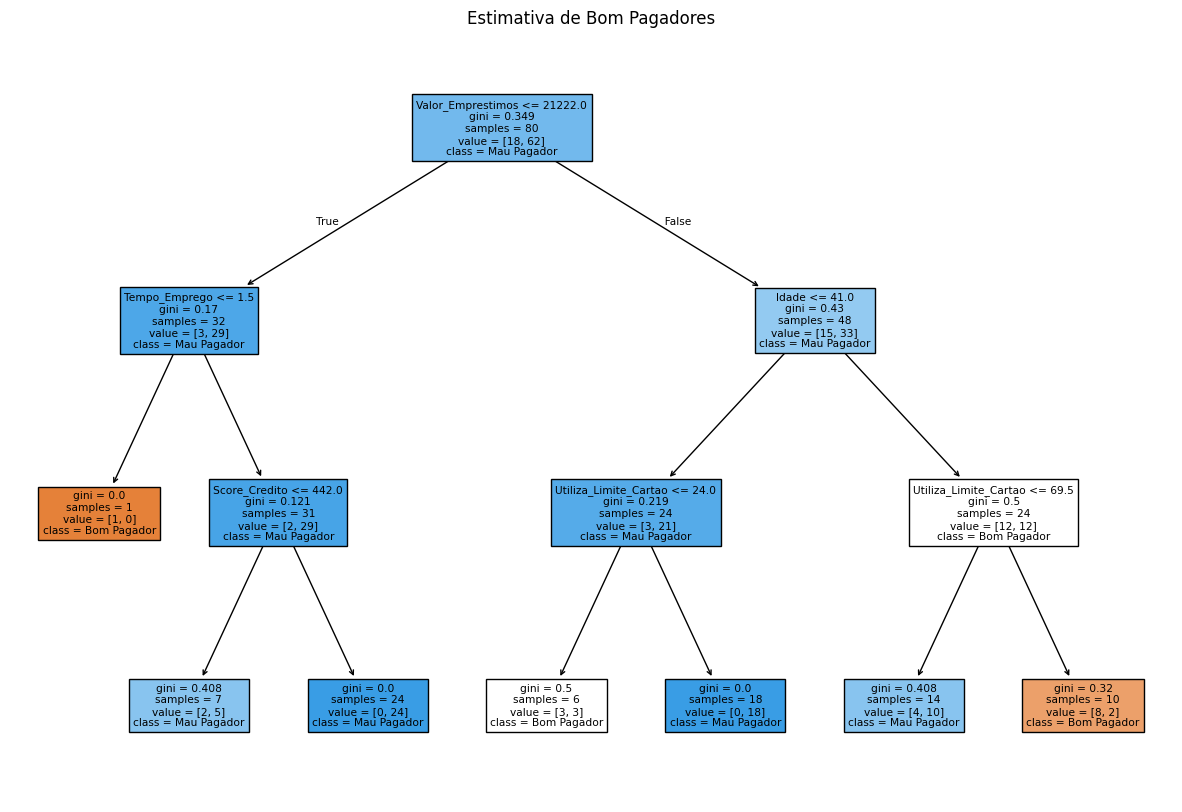

In [18]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(
    modelo,feature_names= features,
    class_names=['Bom Pagador', 'Mau Pagador'],
    filled=True
)

plt.title('Estimativa de Bom Pagadores')

In [15]:
print(round(accuracy_score(y,modelo.predict(x)), 2))

0.82


In [16]:
y_pred = modelo.predict(X_test)

In [17]:
#print('Acuracia:', accuracy_score(y_train,y_pred))
print('Relatório do modelo:')
print(classification_report(y_test,y_pred))

Relatório do modelo:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.67      0.83      0.74        12

    accuracy                           0.65        20
   macro avg       0.63      0.60      0.60        20
weighted avg       0.64      0.65      0.63        20

